In [1]:
# %% Imports
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score

# %% Load dataset and create train-test sets
data = load_iris()
X = data.data
y = data.target
var_names = data.feature_names
var_names = [var_names[i][0:-5] for i in range(0, len(var_names))]
var_names = [var_names[i].title().replace(' ','') for i in range(0, len(var_names))]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, precision_score, recall_score, f1_score
from numpy import clip, column_stack, argmax, vectorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

attributes = ['target_class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols','Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue','ProteinConcentration', 'Proline']
features = ['Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols','Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue','ProteinConcentration', 'Proline']
df = pd.read_csv('wine.data', names=attributes)

# Check if df has missing values
if df.isnull().values.any():
    print('The dataset has missing values')

# Check if df has duplicate rows
if df.duplicated().any():
    print('The dataset has duplicate rows')

# Check if df has duplicate columns
if df.columns.duplicated().any():
    print('The dataset has duplicate columns')

scaler = MinMaxScaler()
data = scaler.fit_transform(df[features])
data = df[features].to_numpy()

# Define X as all columns except 'target_class'
X = data
# Define y as the 'target_class' column
y = df['target_class']
y = y.to_numpy()

# random_state=42
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

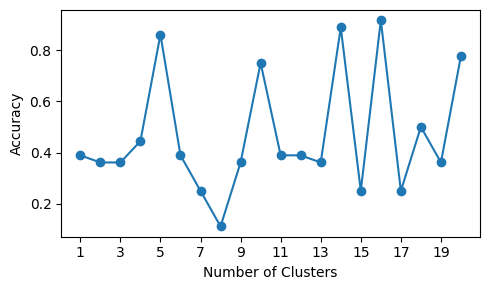

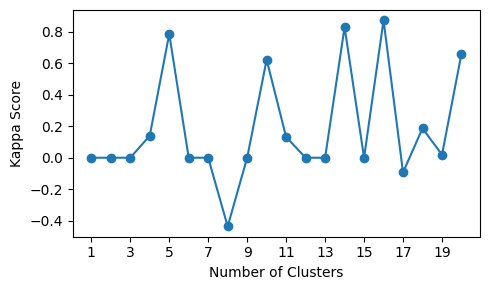

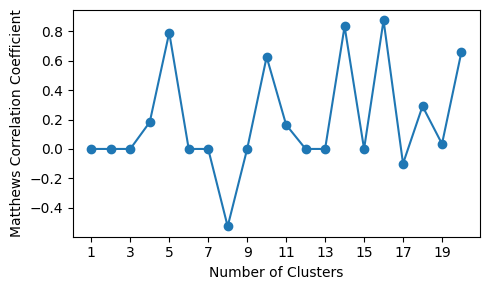

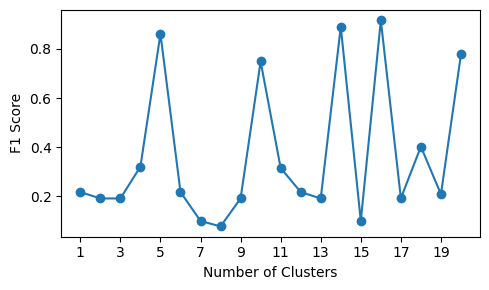

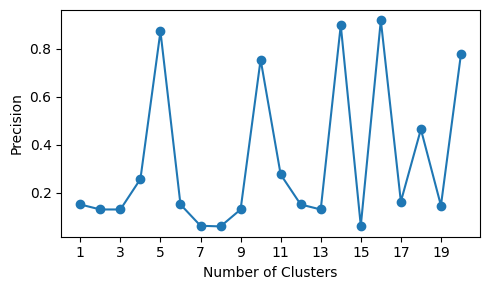

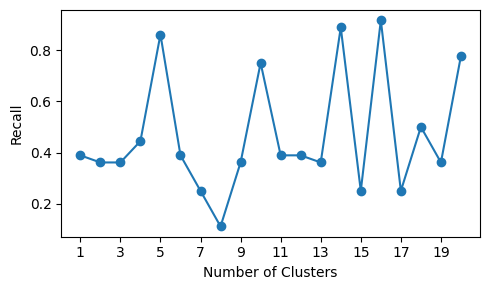

In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning

# Suppress the specific UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize lists to store results
num_neurons_list = list(range(1, 21, 1))
accuracy_scores = []
kappa_scores = []
matthews_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for num_neurons in num_neurons_list:

    # %% Train model
    regr = MLPClassifier(hidden_layer_sizes=(num_neurons), random_state=1, max_iter=500)
    regr.fit(X_train, y_train)

    # %% Get model predictions
    y_pred = regr.predict(X_test)

    # %% Compute classification metrics
    acc_score = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    matthew = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(acc_score)
    kappa_scores.append(kappa)
    matthews_scores.append(matthew)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

plt.figure(figsize=(5, 3))
plt.plot(num_neurons_list, accuracy_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Accuracy")
plt.savefig('accuracy.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(num_neurons_list, kappa_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Kappa Score")
plt.savefig('kappa.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(num_neurons_list, matthews_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Matthews Correlation Coefficient")
plt.savefig('matthews.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(num_neurons_list, f1_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("F1 Score")
plt.savefig('f1.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(num_neurons_list, precision_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Precision")
plt.savefig('precision.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(num_neurons_list, recall_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Recall")
plt.savefig('recall.png')
plt.tight_layout()
plt.show()